In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./data/c_0000.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       64000 non-null  float64
 1   y       64000 non-null  float64
 2   z       64000 non-null  float64
 3   vx      64000 non-null  float64
 4   vy      64000 non-null  float64
 5   vz      64000 non-null  float64
 6   m       64000 non-null  float64
 7   id      64000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.9 MB


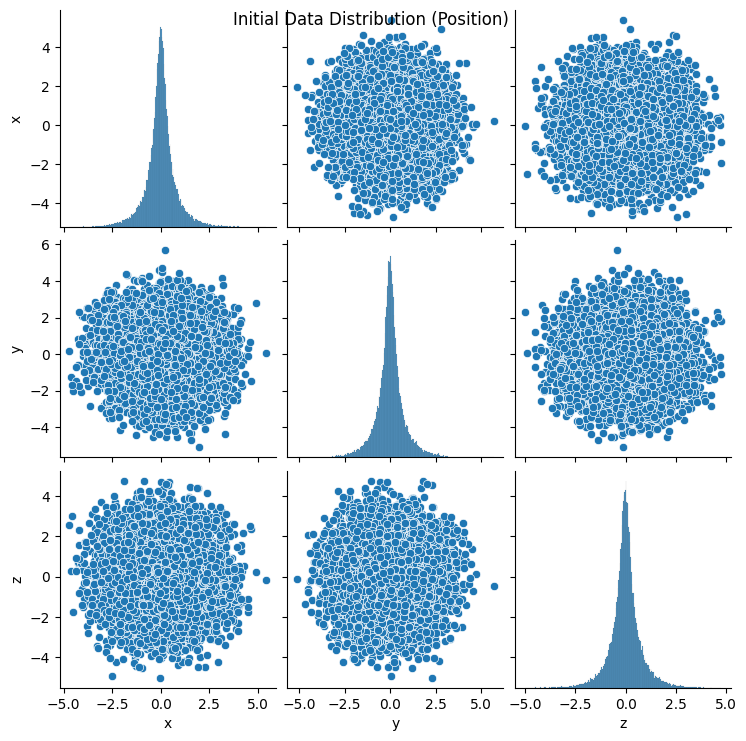

In [5]:
sns.pairplot(pd.DataFrame(df[['x', 'y', 'z']], columns=['x', 'y', 'z']))
plt.suptitle("Initial Data Distribution (Position)")
plt.show()

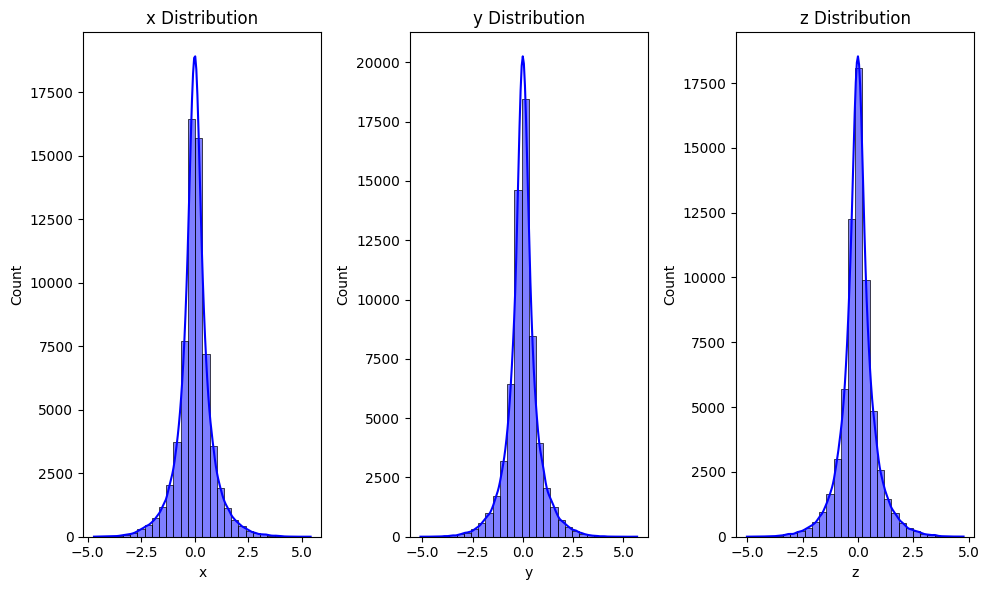

In [6]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(['x', 'y', 'z']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

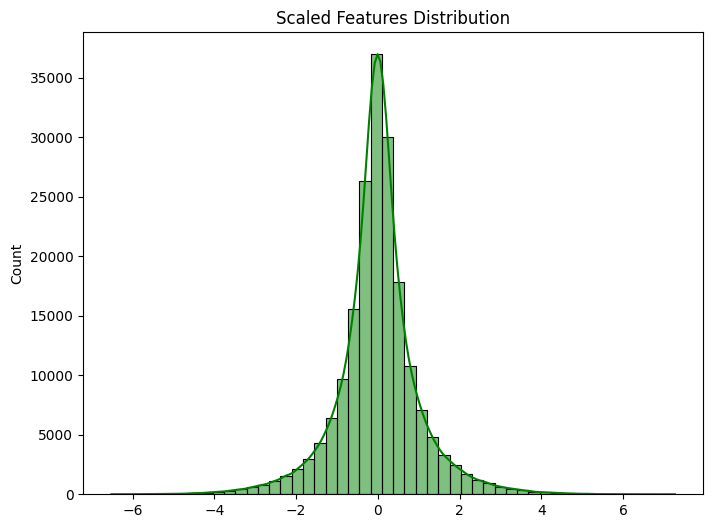

In [9]:
from sklearn.preprocessing import StandardScaler

# Select features of interest (x, y, z positions for clustering)
features = df[['x', 'y', 'z']]

# Standardize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Visualize feature distributions after scaling
plt.figure(figsize=(8, 6))
sns.histplot(features_scaled.flatten(), kde=True, bins=50, color='green')
plt.title("Scaled Features Distribution")
plt.show()


In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(features_scaled)

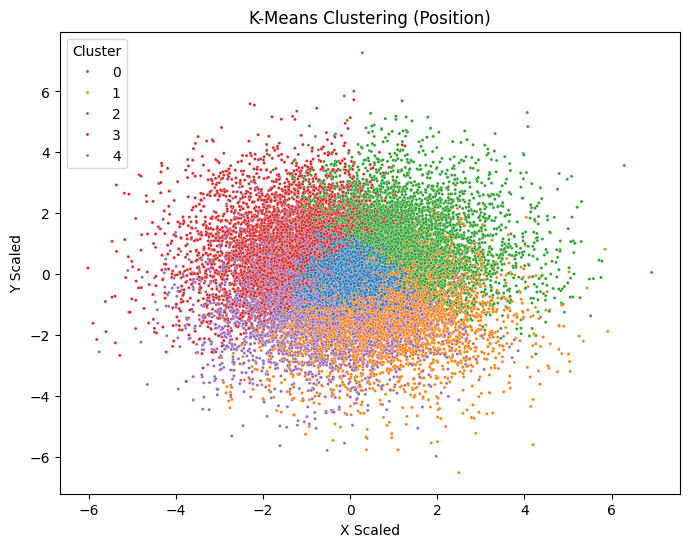

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=kmeans_labels, palette='tab10', s=5)
plt.title("K-Means Clustering (Position)")
plt.xlabel("X Scaled")
plt.ylabel("Y Scaled")
plt.legend(title='Cluster')
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5) 
agg_labels = agg_clustering.fit_predict(features_scaled)

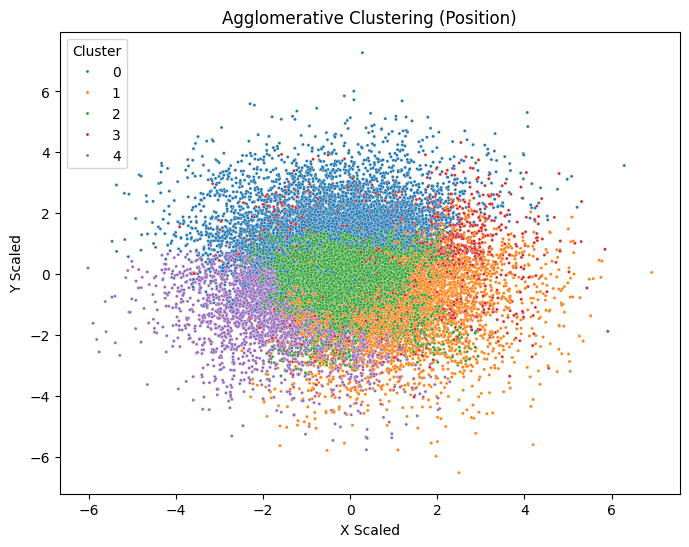

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=agg_labels, palette='tab10', s=5)
plt.title("Agglomerative Clustering (Position)")
plt.xlabel("X Scaled")
plt.ylabel("Y Scaled")
plt.legend(title='Cluster')
plt.show()

In [13]:
kmeans_silhouette = silhouette_score(features_scaled, kmeans_labels)
agg_silhouette = silhouette_score(features_scaled, agg_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")

K-Means Silhouette Score: 0.3004393791072546
Agglomerative Clustering Silhouette Score: 0.3509242467824932


In [16]:
df['kmeans_cluster'] = kmeans_labels
df['agg_cluster'] = agg_labels

for cluster in range(5):
    print(f"\nCluster {cluster}:")
    print(df[df['kmeans_cluster'] == cluster].describe())


Cluster 0:
                  x             y             z            vx            vy  \
count  35838.000000  35838.000000  35838.000000  35838.000000  35838.000000   
mean      -0.001675      0.003071     -0.004193      0.001846      0.003176   
std        0.330900      0.328572      0.328061      0.463736      0.462917   
min       -1.265734     -1.191684     -1.261059     -1.619203     -1.482613   
25%       -0.203968     -0.197782     -0.206037     -0.320610     -0.318864   
50%       -0.001345      0.002080     -0.006185      0.001687      0.005718   
75%        0.200635      0.203268      0.192612      0.321216      0.325180   
max        1.301807      1.302247      1.369421      1.547319      1.584202   

                 vz             m            id  kmeans_cluster   agg_cluster  
count  35838.000000  3.583800e+04  35838.000000         35838.0  35838.000000  
mean      -0.000326  1.562500e-05  31972.813550             0.0      1.972822  
std        0.461163  3.388179e-21  1